# **Pure Conduction**


<div align="center">
<img src=
"https://pato.ac/wp-content/uploads/pato_logo_MSL_recession.png"
width="80%">
</div>
<br />





##**Miniconda installation**

Miniconda serves as the foundation for managing packages and environments for our PATO installation. It offers a lightweight solution to handle different versions of packages and Python itself, without overloading your system with unnecessary packages. Follow these steps to install Miniconda:


1.  Download the Miniconda installer script.
2.  Make the script executable and run it.
3.  Initialize Miniconda and update your environment variables.

This process ensures that Miniconda is correctly set up, paving the way for a smooth PATO installation.

##**Python packages and visualization tools**

To enhance your work with PATO, certain Python packages and post-processing libraries are indispensable. These packages provide additional functionalities, ranging from data analysis and visualization to more complex post-processing tasks. Ensure these packages are installed and accessible in your PATO environment to take full advantage of what PATO has to offer.

In [ ]:
%%capture libs_install
!pip install matplotlib ipykernel pdf2image
!source $CONDA_DIR/bin/activate pato && pip install matplotlib ipykernel pdf2image
!apt-get install poppler-utils tree

# Functions
from pdf2image import convert_from_path
from IPython.display import display, Javascript, HTML
import io
from PIL import Image

# Display a pdf: display(HTML(display_pdf("path_to_file")))
def display_pdf(pdf_path):
    # Convert the first page of the PDF to an image
    images = convert_from_path(pdf_path)

    # Convert the PIL image to a byte array
    img_byte_arr = io.BytesIO()
    images[0].save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    # Create a base64 encoded string for the image
    import base64
    img_base64 = base64.b64encode(img_byte_arr).decode('utf-8')

    # Display the image with HTML, setting its size to 50% of the container
    html_str = f'<img src="data:image/png;base64,{img_base64}" style="width: 50%;">'
    return html_str

# Display a text file and highlight lines with search_strings: display(HTML(display_file("path_to_file")))
def display_file(file_path, search_strings=[]):
    if not isinstance(search_strings, list):
        raise ValueError("search_strings must be a list of strings")

    # Define a visually appealing yellow color and CSS for preserving whitespace
    pretty_yellow = 'rgba(255, 235, 59, 0.3)'  # Light yellow; adjust the color as needed
    preserve_whitespace_css = 'white-space: pre-wrap;'

    highlighted_content = []
    with open(file_path, 'r') as file:
        for line in file:
            is_highlighted = False
            # Identify leading whitespace
            leading_whitespace = len(line) - len(line.lstrip())

            # Check if any of the search strings is in the current line
            for search_string in search_strings:
                if search_string in line:
                    is_highlighted = True
                    break  # No need to check other strings if one is found

            # Process the line to highlight up to the last non-whitespace character
            if is_highlighted:
                # Preserve leading whitespace outside of the highlighted area
                line_content = line[leading_whitespace:].rstrip()
                highlighted_line = f'<div style="{preserve_whitespace_css}">' + " " * leading_whitespace + f'<span style="background-color: {pretty_yellow};">{line_content}</span></div>'
            else:
                # Preserve the entire line structure for non-highlighted lines
                highlighted_line = f'<div style="{preserve_whitespace_css}">{line.rstrip()}</div>'

            highlighted_content.append(highlighted_line)

    # Join the lines directly, as <div> tags inherently move to a new line
    highlighted_file_contents = ''.join(highlighted_content)
    return highlighted_file_contents

In [ ]:
# libs_install.show() # uncomment this cell to show the output

##**PATO run: 1D/PureConduction**

Embark on your first PATO simulation with the 1D/PureConduction tutorial. This tutorial guides you through setting up and running a basic ablation simulation in PATO, covering:

1. Preparing the simulation configuration.
2. Running the simulation with PATO.
3. Post-processing and analyzing the simulation results.

This initial run serves as a practical introduction to PATO's capabilities and simulation workflow, providing a solid foundation for more complex projects.

In [ ]:
!source $CONDA_DIR/bin/activate pato > /dev/null 2>&1 && \
cp -r $PATO_TUTORIALS . && \
cd tutorials/1D/PureConduction && \
./Allclean && \
tree

.
├── Allclean
├── Allplot
├── Allrun
├── constant
│   ├── porousMat
│   │   └── porousMatProperties
│   └── regionProperties
├── origin.0
│   └── porousMat
│       ├── cp
│       ├── k
│       ├── p
│       ├── rho_s
│       └── Ta
├── output
│   └── empty
├── plots
│   └── plot.py
└── system
    ├── controlDict
    └── porousMat
        ├── blockMeshDict
        ├── fvSchemes
        ├── fvSolution
        ├── plotDict
        └── surfacePatchDict

8 directories, 18 files


In [ ]:
%%capture pato_PureConduction_run_1
!source $CONDA_DIR/bin/activate pato && \
rm -rf tutorials/1D/PureConduction_run_1 && \
cp -r tutorials/1D/PureConduction tutorials/1D/PureConduction_run_1 && \
cd tutorials/1D/PureConduction_run_1 && \
./Allclean && \
./Allrun && \
./Allplot

In [ ]:
# pato_PureConduction_run_1.show() # uncomment this cell to show the output


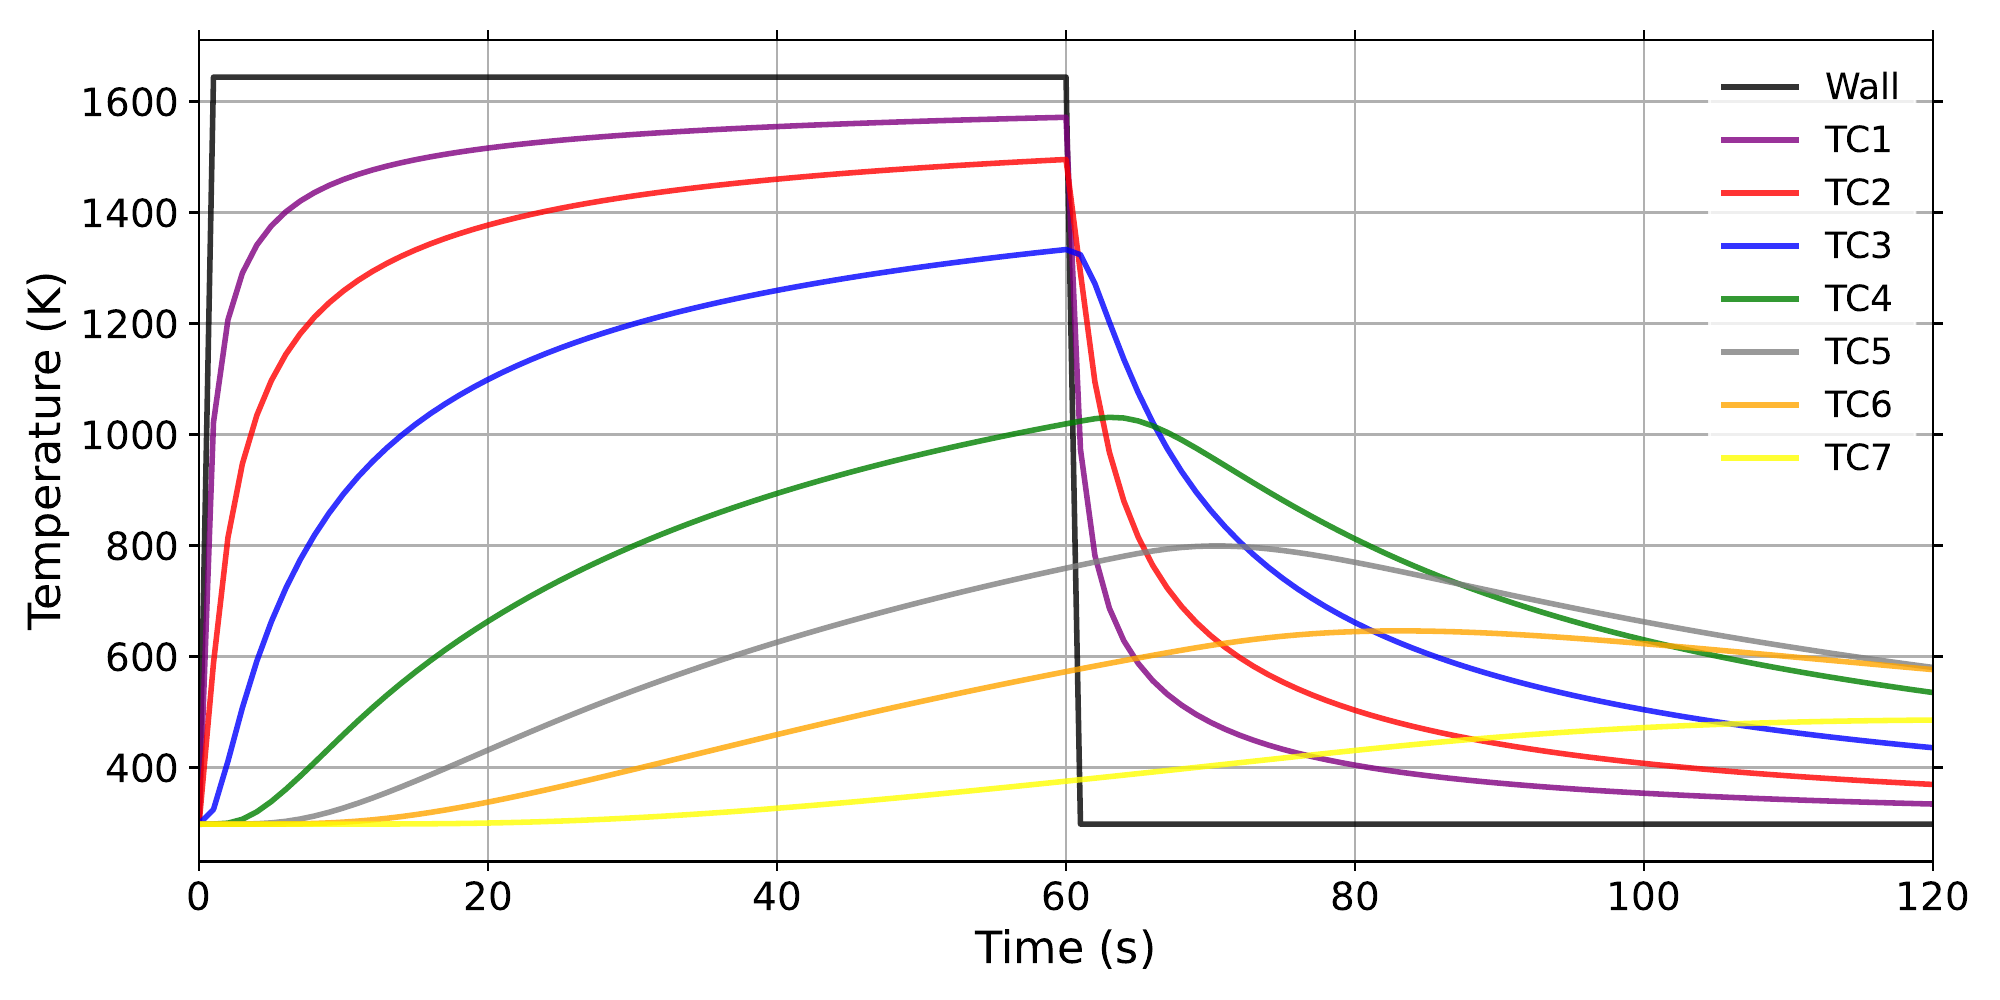

In [ ]:
display(HTML(display_pdf("tutorials/1D/PureConduction_run_1/plots/Temperature.pdf")))

###**Exploration of the key input files**

The *constant/porousMat/porousMatProperties* file is critical for defining the physical models and input/output parameters specific to your simulation. This configuration file allows you to tailor the simulation environment to the particular characteristics of the porous material under study, including thermal properties, reaction kinetics, and more.

In [ ]:
# Display file as a code block
display(HTML(display_file("tutorials/1D/PureConduction/constant/porousMat/porousMatProperties",["writeFields"])))

Similar to OpenFOAM, the *system/controlDict* file serves as the central place for setting general simulation parameters such as startTime, endTime, and time step controls. It plays a key role in defining the overall behavior of your simulation, including how data is written out and the duration of the simulation.

In [ ]:
# Display file as a code block
display(HTML(display_file("tutorials/1D/PureConduction/system/controlDict",["endTime "])))

###**Variation of input parameters**


In this section, we delve into customizing our PATO simulation to better understand the impact of specific parameters on the outcome.

1. Modifying "endTime" in *controlDict* change the end time of the simulation.
2. Changing "writeFields" in *porousMatProperties* allows us to print all the fields at every "writeInterval" time (defined in *controlDict*).

In [ ]:
%%capture pato_PureConduction_run_2
!source $CONDA_DIR/bin/activate pato && \
rm -rf tutorials/1D/PureConduction_run_2 && \
cp -r tutorials/1D/PureConduction tutorials/1D/PureConduction_run_2 && \
cd tutorials/1D/PureConduction_run_2 && \
sed -i "s/endTime         120;/endTime         4;/g" system/controlDict && \
sed -i "s/writeFields()/writeFields (all)/g" constant/porousMat/porousMatProperties && \
./Allclean && \
./Allrun && \
./Allplot

In [ ]:
# pato_PureConduction_run_2.show() # uncomment this cell to show the output


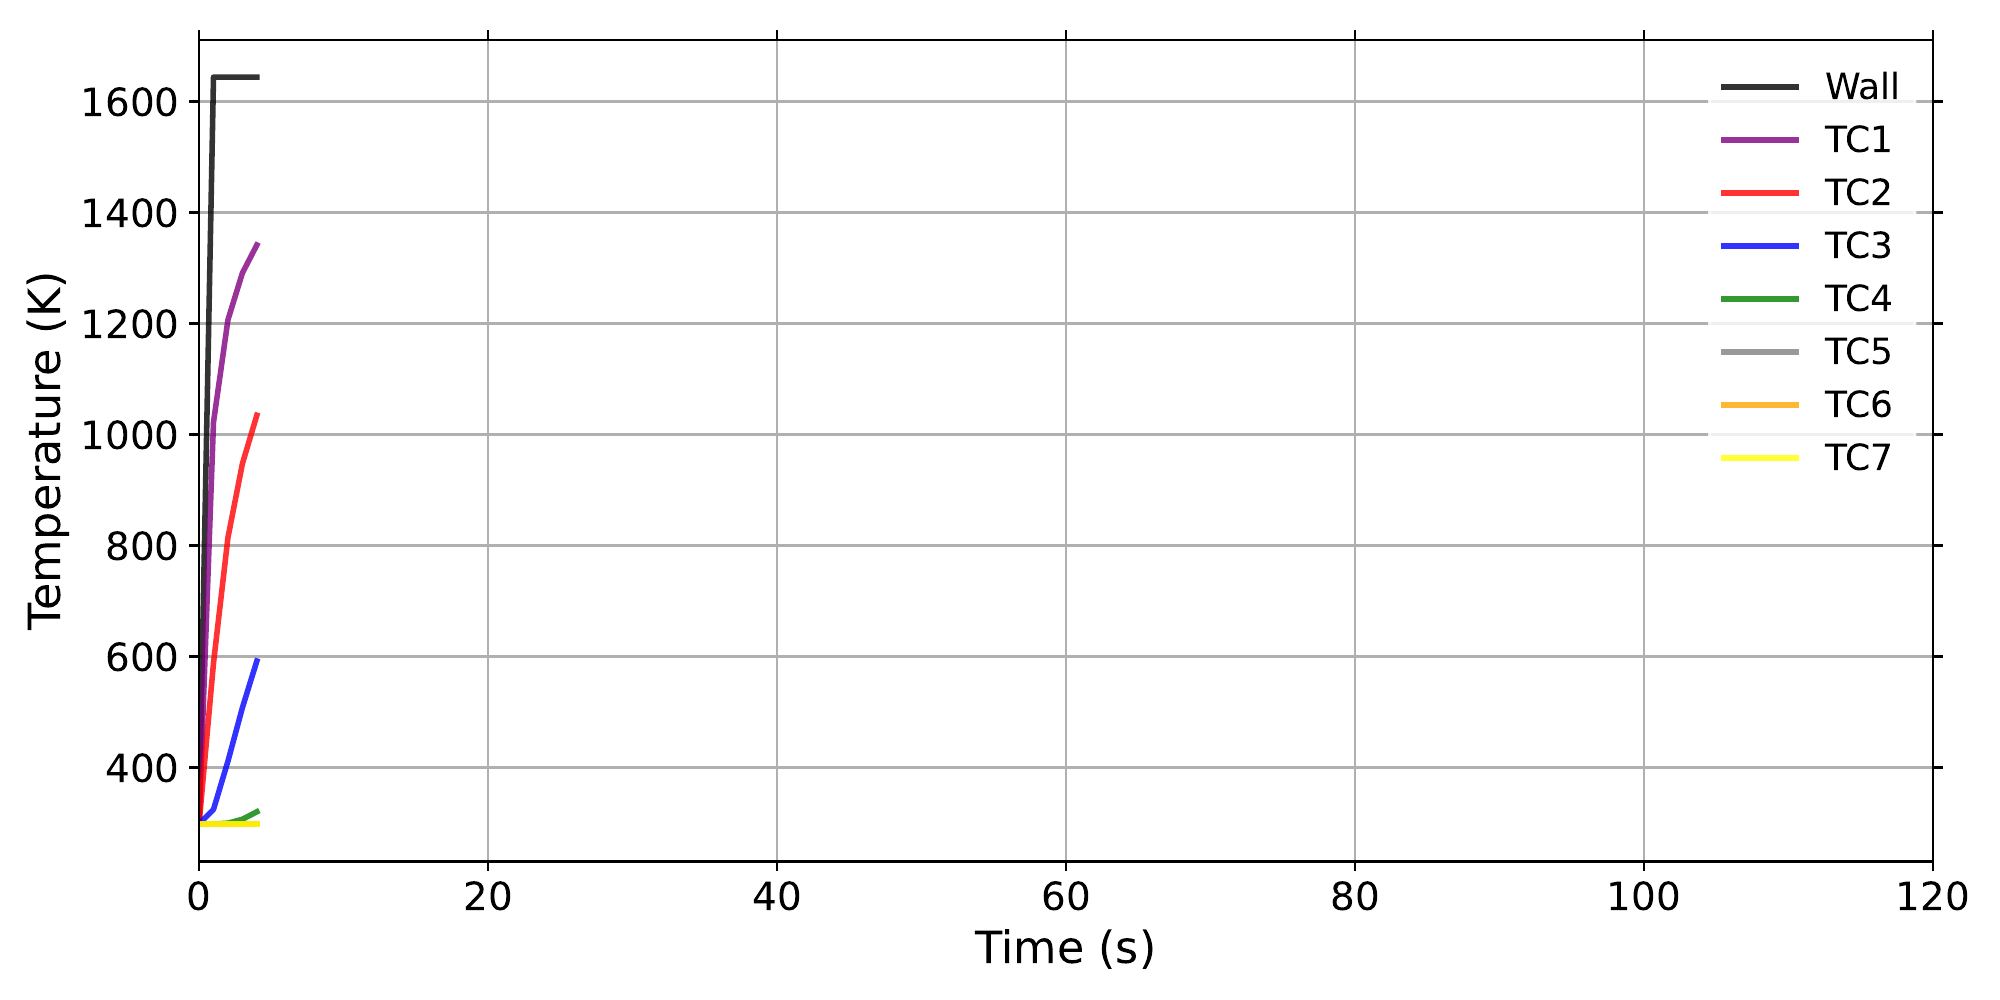

In [ ]:
display(HTML(display_pdf("tutorials/1D/PureConduction_run_2/plots/Temperature.pdf")))

In [ ]:
!source $CONDA_DIR/bin/activate pato > /dev/null 2>&1 && \
cd tutorials/1D/PureConduction_run_2/1/porousMat && \
tree

.
├── cp
├── epsI_s[1]
├── epsI_s[2]
├── eps_s[1]
├── eps_s[2]
├── k
├── k_abl_sym
├── kijk
├── one
├── p
├── piTotal
├── rho_c
├── rhoI_s[1]
├── rhoI_s[2]
├── rho_s
├── rho_s[1]
├── rho_s[2]
├── rho_v
├── Ta
└── tau

0 directories, 20 files


###**Parallel computation**

In this segment, we explore the power of parallel computing to enhance the efficiency and speed of our PATO simulations. Parallel computing allows PATO to utilize multiple processors simultaneously, significantly reducing computation times for complex simulations and enabling the handling of larger datasets or finer mesh resolutions than would be feasible on a single processor. PATO simulations must be set up to run on multiple cores, involving:

1. Configuring parallel settings in *system/porousMat/decomposeParDict*.
2. Decomposing the mesh using *decomposePar* utility.
3. Running the simulation in parallel using *mpiexec*.
4. Reconstructing the mesh using *reconstructPar* utility.

In this notebook, the following modifications have been implemented due to the use of a Virtual Machine (VM) on Google Colab.

1. `os.environ["OMPI_ALLOW_RUN_AS_ROOT"]="1"` and `os.environ["OMPI_ALLOW_RUN_AS_ROOT_CONFIRM"]="1"` to enable the execution of MPI with root privileges.
2. `mpiexec --oversubscribe` to permit the oversubscription of CPUs, enabling the execution of more processes than the number of available CPUs.

By incorporating parallel computing strategies into your PATO simulations, you can tackle more complex problems and achieve results faster than ever before. This opens new horizons in research and development, pushing the boundaries of what can be achieved through computational analysis.

In [ ]:
%%capture pato_PureConduction_run_3
os.environ["OMPI_ALLOW_RUN_AS_ROOT"]="1"
os.environ["OMPI_ALLOW_RUN_AS_ROOT_CONFIRM"]="1"
!source $CONDA_DIR/bin/activate pato && \
rm -rf tutorials/1D/PureConduction_run_3 && \
cp -r tutorials/1D/PureConduction tutorials/1D/PureConduction_run_3 && \
cp tutorials/3D/MSL_monolithic/system/porousMat/decomposeParDict tutorials/1D/PureConduction_run_3/system/porousMat/decomposeParDict && \
cd tutorials/1D/PureConduction_run_3 && \
cat system/porousMat/decomposeParDict && \
sed -i "s/porousMat (1 100 1)/porousMat (1 800 1)/g" system/porousMat/blockMeshDict && \
sed -i "s/numberOfSubdomains 2;/numberOfSubdomains 4;/g" system/porousMat/decomposeParDict && \
./Allclean && \
cp -r origin.0 0 && \
blockMesh -region porousMat && \
decomposePar -region porousMat && \
mpiexec --oversubscribe -np 4 PATOx -parallel && \
reconstructPar -region porousMat && \
./Allplot

In [ ]:
# pato_PureConduction_run_3.show() # uncomment this cell to show the output


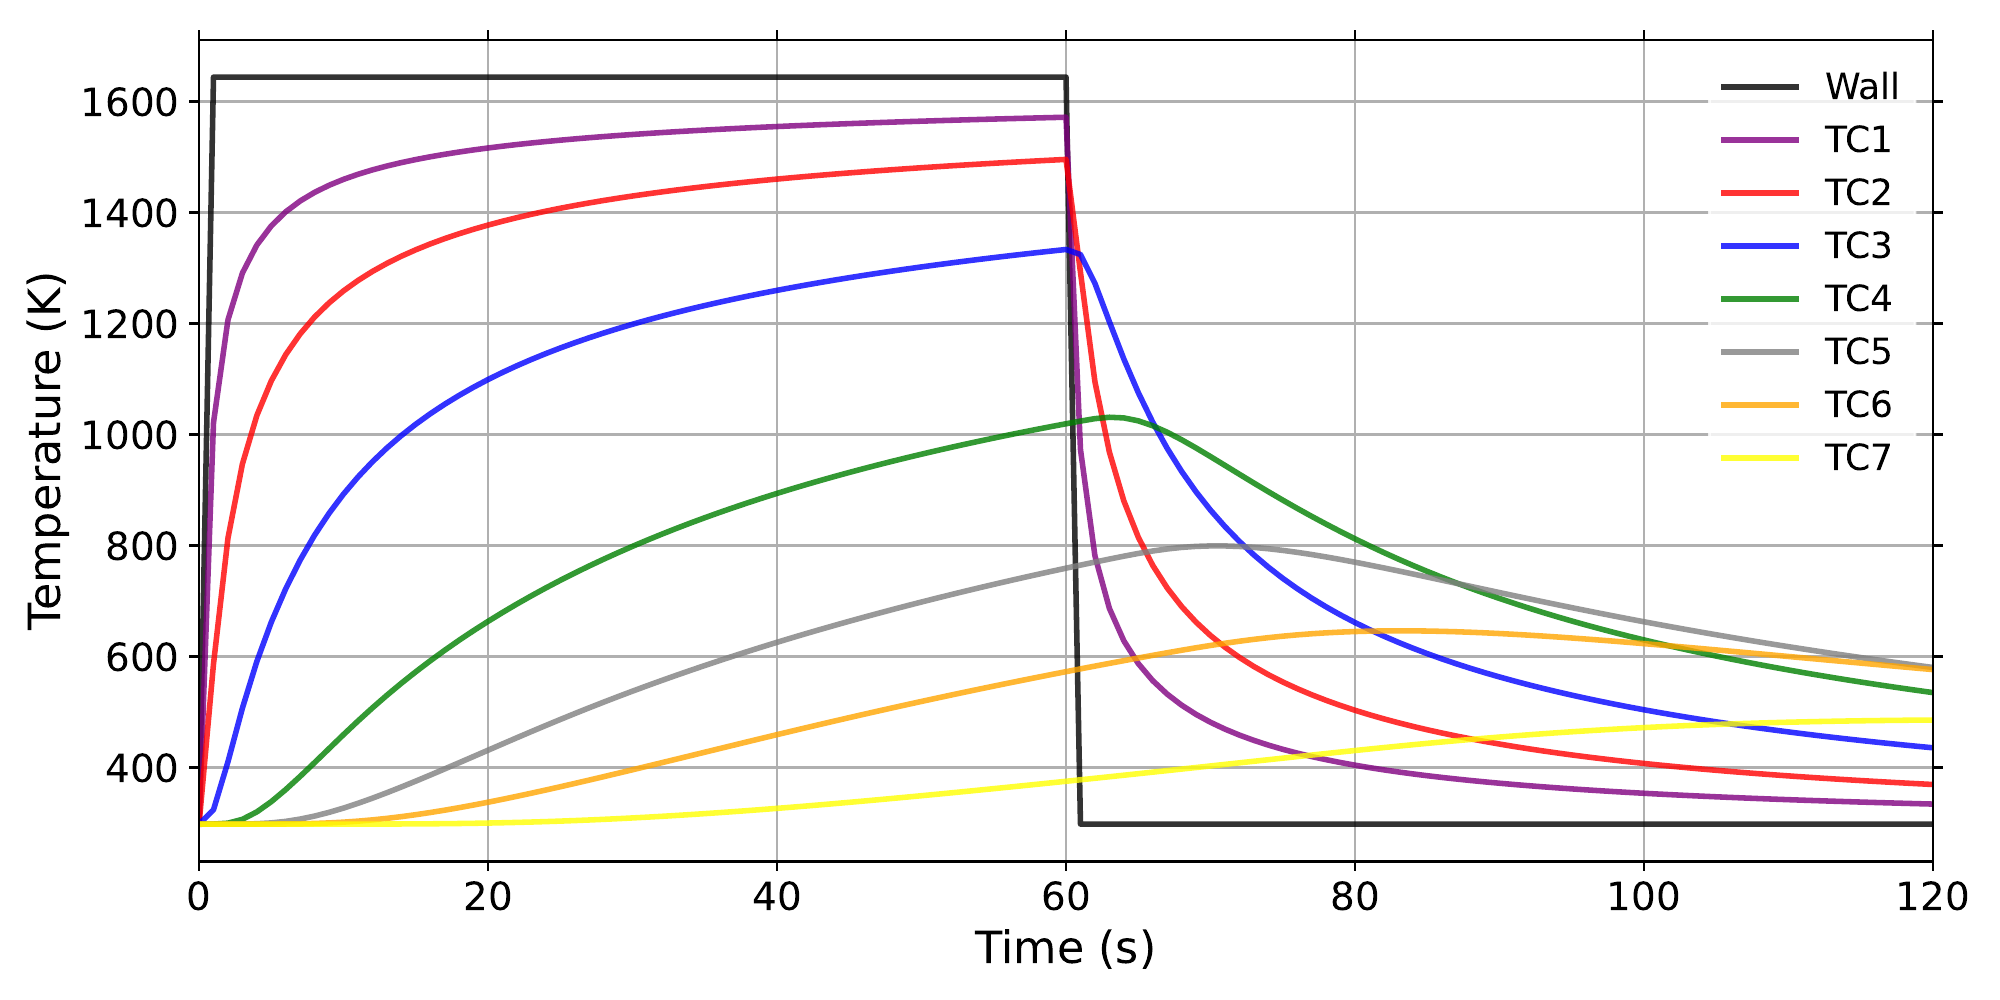

In [ ]:
display(HTML(display_pdf("tutorials/1D/PureConduction_run_3/plots/Temperature.pdf")))